<a href="https://colab.research.google.com/github/raulbenitez/DES_simulation/blob/main/Factor_Analysis_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Factor Analysis:

Factor analysis is an exploratory analysis tool that allows to identofy hidden/latent factors in a dataset that are relevant for the outcome of a certain variable. The main difference between Principal Component Analysis (PCA) and Factor Analysis (FA) is that PCA identifies combinations of observable variables that account for a maximal variance ((principal components) whereas FA accounts for **common variance** in the data (factors).

We are going to follow an example adapted from:

https://towardsdatascience.com/factor-analysis-a-complete-tutorial-1b7621890e42

that uses the well known Airline Passanger's satisfaction database: 

 https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction



## Load the data:

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [19]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/data_course/airline satisfaction/train.csv',index_col=0)

In [20]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


Visualize correlations with a heatmal correlation plot:

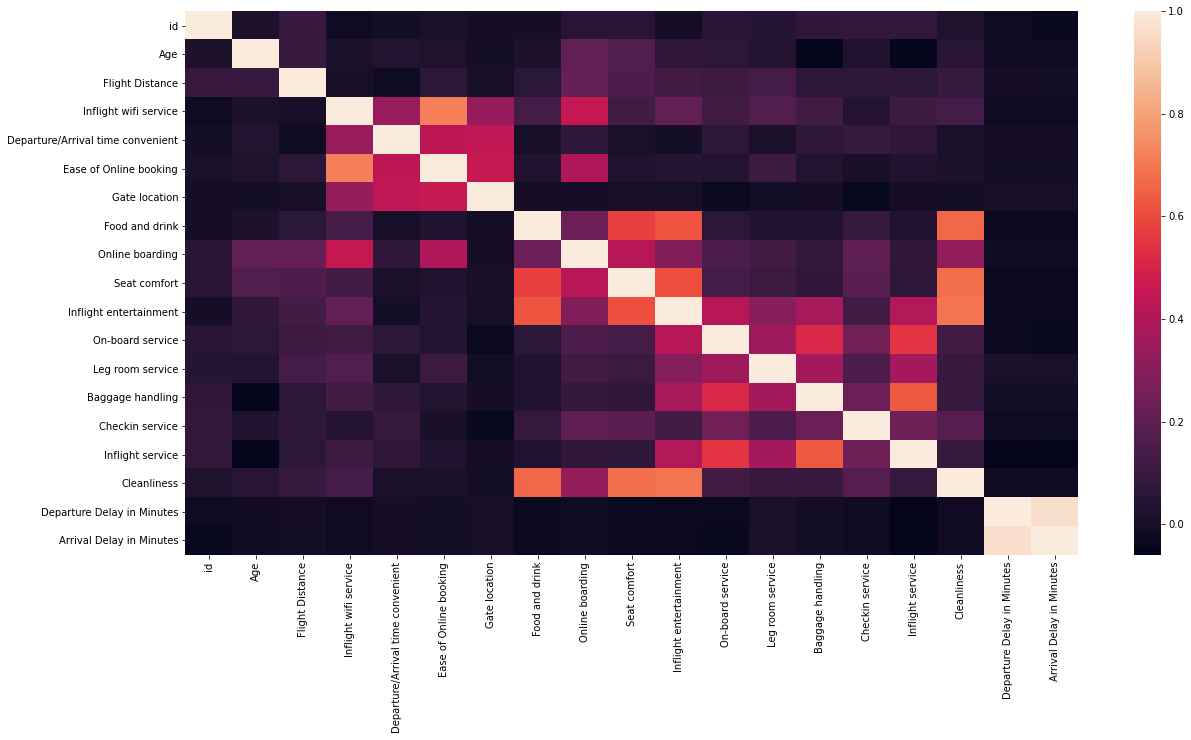

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c)

Remove highly correlated variables like “Departure Delay in Minutes” and “Arrival Delay in Minutes”

In [22]:
df.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)

In [23]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,satisfied


Install factor analysis libraries

https://pypi.org/project/factor-analyzer/

you can also use sklearn's factor analysis from the decomposition tools 

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html


In [24]:
!pip install factor_analyzer  
from factor_analyzer import FactorAnalyzer

Check ho many latent/hidden factors do you want to consider:

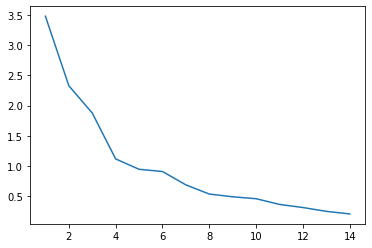

In [26]:
#Subset of the data, the 14 columns containing the survey answers
x =df[df.columns[6:20]] 
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In this case we consider only three factors due to the larg drop in the eigenvalues:

In [27]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(x)
loads = fa.loadings_


[[ 0.10011605  0.03270963  0.16290453]
 [ 0.11711458  0.74752012  0.20984582]
 [ 0.06431814  0.50838919 -0.03329373]
 [ 0.01661908  0.92737149  0.07571928]
 [-0.02747264  0.51043569 -0.03561914]
 [-0.00252644 -0.02040018  0.72233719]
 [ 0.09969206  0.34298244  0.44200617]
 [ 0.0572833  -0.00723618  0.81263156]
 [ 0.44521008 -0.01447287  0.7391309 ]
 [ 0.69666452  0.02465682  0.12499176]
 [ 0.47907895  0.07703222  0.10233216]
 [ 0.7654474   0.02873745  0.038456  ]
 [ 0.28288885  0.02548823  0.14232182]
 [ 0.79946508  0.01925971  0.03533499]]


The loads provide the weight of each variable in each of the factors:

In [28]:
print(loads)

[[ 0.10011605  0.03270963  0.16290453]
 [ 0.11711458  0.74752012  0.20984582]
 [ 0.06431814  0.50838919 -0.03329373]
 [ 0.01661908  0.92737149  0.07571928]
 [-0.02747264  0.51043569 -0.03561914]
 [-0.00252644 -0.02040018  0.72233719]
 [ 0.09969206  0.34298244  0.44200617]
 [ 0.0572833  -0.00723618  0.81263156]
 [ 0.44521008 -0.01447287  0.7391309 ]
 [ 0.69666452  0.02465682  0.12499176]
 [ 0.47907895  0.07703222  0.10233216]
 [ 0.7654474   0.02873745  0.038456  ]
 [ 0.28288885  0.02548823  0.14232182]
 [ 0.79946508  0.01925971  0.03533499]]


Simplify factors by keeping only variables with that present a load larger than 0.5:

- Comfort: Food and Drink, Seat comfort, Inflight entertainment, Cleanliness
- Service: Onboard service, Baggage Handling, Inflight Service
- Convenience: In flight Wifi, Departure/Arrival time convenience, Online Booking, Gate Location.


Create the simplified factors and check their statistical significance by estimating Chronbach alpha using the statistical library pinguoin:

https://pingouin-stats.org/generated/pingouin.cronbach_alpha.html



In [29]:
!pip install pingouin
import pingouin as pg
#Create the factors
factor1 = df[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = df[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']]
#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)


     |████████████████████████████████| 225kB 9.1MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.8-cp36-none-any.whl size=221688 sha256=fbc4c9a9232018ab82d6110e0de4718eb234d33d24410dedeb811c368474ae81
  Stored in directory: /root/.cache/pip/wheels/d6/9e/53/f885f73f29cf7c8cac3d8f4b1532bbfef2f5eb543946ac9055
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=bb7918fdda7f07887396dbb81d07b15915042e7c488e19efe1215a6dd3b8cc31
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=24102dc918c0d6cb40609c6a2b9fd51e6f1ed73a52e19665656f8931f06b0272
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils
(0.8762877916624099, array([0.875, 0.878])) (0.7942916933090214, array([0.792, 0.796])) (0.76797542111106

Check Cronbach alpha for each factor with the corresponding confidence interval:

In [34]:
print('Cronbach alpha factor 1 = {}, CI = {}'.format(*factor1_alpha))
print('Cronbach alpha factor 2 = {}, CI = {}'.format(*factor2_alpha))
print('Cronbach alpha factor 3 = {}, CI = {}'.format(*factor3_alpha))

Cronbach alpha factor 1 = 0.8762877916624099, CI = [0.875 0.878]
Cronbach alpha factor 2 = 0.7942916933090214, CI = [0.792 0.796]
Cronbach alpha factor 3 = 0.7679754211110683, CI = [0.766 0.77 ]


All them provide a reasonable value, indicating that the identified latent factors are statistically relevant